### 一、模块导入与全局配置

In [1]:
import os,warnings
os.makedirs('png',exist_ok=True)
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # 这个主要用在将轴刻度改为百分比显示
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
from matplotlib.legend import _get_legend_handles_labels as get_legend_handles_labels

plt.style.use("default") # 先恢复默认
plt.style.use("ggplot") # 再设置主题
plt.rcParams["font.sans-serif"]=["SimHei"] # 设置字体
plt.rcParams["axes.unicode_minus"]=False # 该语句解决图像中的“-”负号的乱码问题
plt.rcParams['font.size'] = 12  # 字体大小

# 生成心形曲线的数据
t = np.linspace(0, 2 * np.pi, 1000)
love_x = 16 * np.sin(t) ** 3
love_y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

np.random.seed(520)
love_data=np.random.randint(520,1314,size=4)
love_label=['L','O','V','E']

np.random.seed(520)
love_df=pd.DataFrame(np.random.uniform(520,1314,size=(10,4)),columns=love_label)

### 二、通用模板

#### 模板一：单图

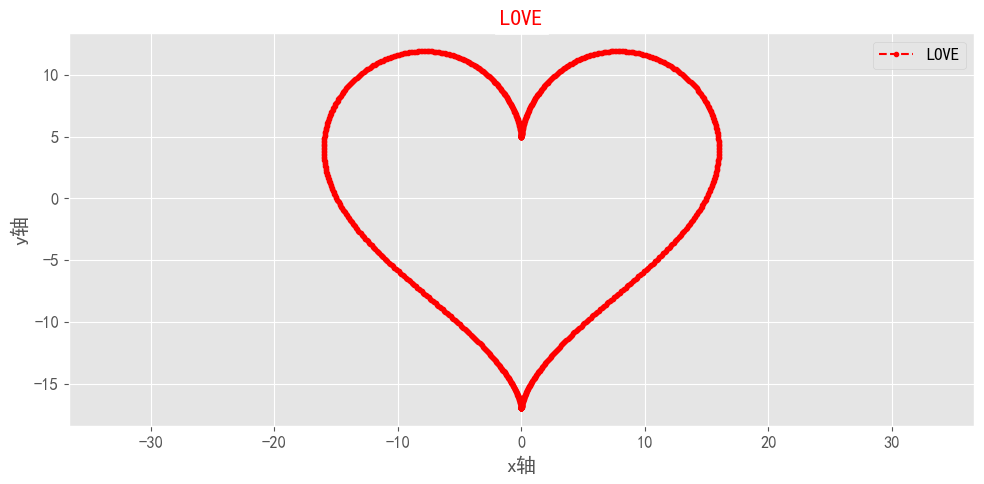

In [2]:
plt.figure(figsize=(10,5))
plt.plot(love_x,love_y,ls='--',marker='o',markersize=3,color='red',label='LOVE')
plt.legend()
plt.xlim(-30,30)
plt.ylim(-15,10)
plt.xlabel('x轴')
plt.ylabel('y轴')
plt.axis('equal') # x,y轴比例一致
plt.title('LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.tight_layout() # 这个一定要放在show和savefig之上
plt.savefig('png/单图.png') # 这个一定要放在show之上
plt.show()

#### 模板二：单图（多y轴）

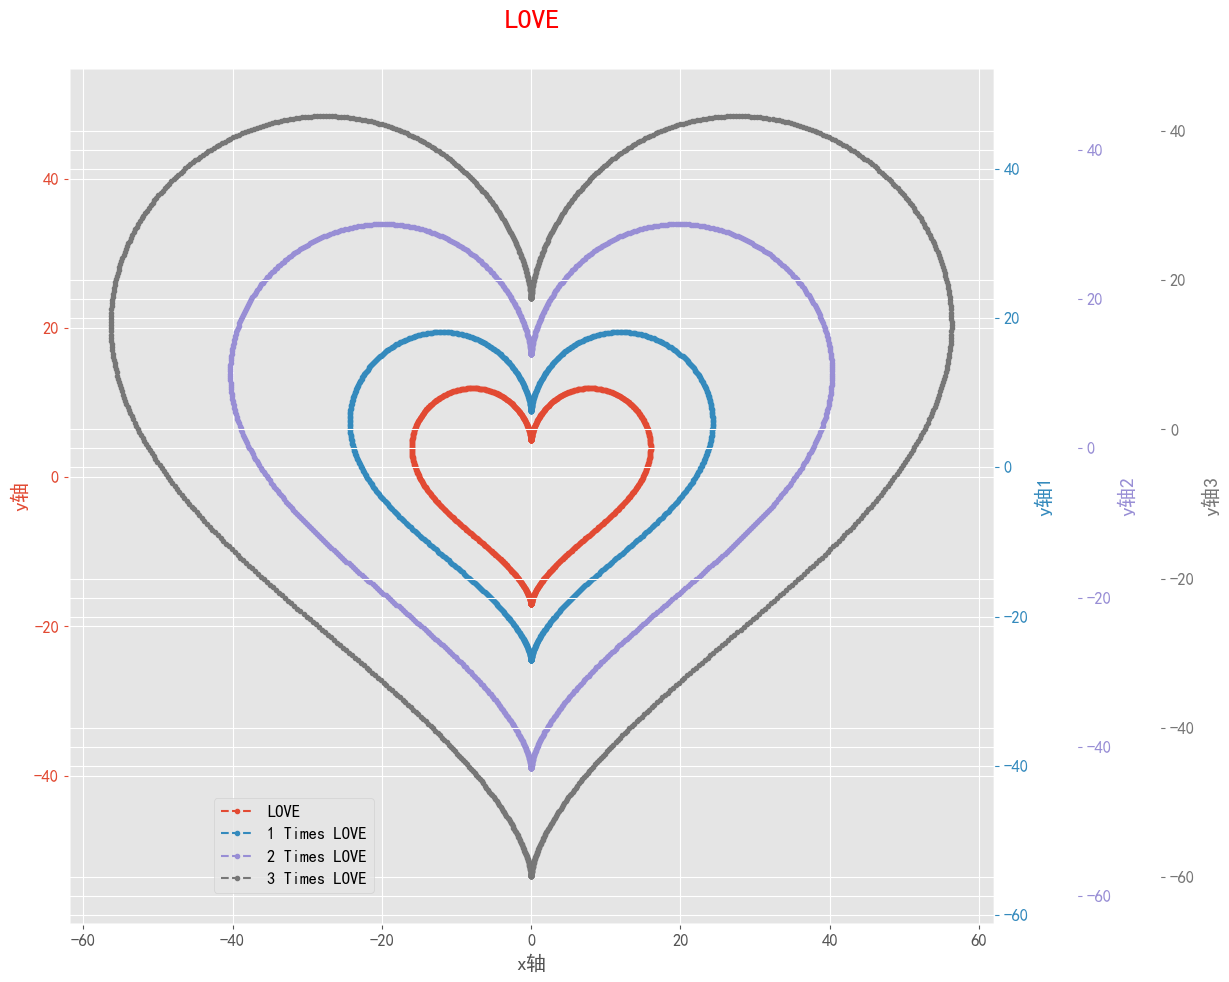

In [3]:
handles=[]
labels=[]
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
for idx in range(4):
    if idx == 0:
        ax.plot(love_x,love_y,ls='--',marker='o',markersize=3,color=f'C{idx}',label='LOVE')
        ax.set_xlabel('x轴')
        ax.set_ylabel('y轴',color=f'C{idx}')
        ax.axis('equal') # x,y轴比例一致
        ax.tick_params('y', colors=f'C{idx}') # y轴颜色
        handles+=ax.get_legend_handles_labels()[0]
        labels+=ax.get_legend_handles_labels()[1]
    else:
        ax_twinx=ax.twinx()
        ax_twinx.plot(love_x*(idx+0.520),love_y*(idx+0.520),ls='--',marker='o',markersize=3,color=f'C{idx}',label=f'{idx} Times LOVE')
        ax_twinx.set_ylabel(f'y轴{idx}',color=f'C{idx}')
        ax_twinx.axis('equal') # x,y轴比例一致
        ax_twinx.tick_params('y', colors=f'C{idx}') # y轴颜色
        if idx >= 2:
            # 设置第三根以上Y轴位置，这里选择是右边
            ax_twinx.spines['right'].set_position(('outward', 60*(idx-1)))
        handles+=ax_twinx.get_legend_handles_labels()[0]
        labels+=ax_twinx.get_legend_handles_labels()[1]

# bbox_to_anchor=(左右,下上,左右,下上)
fig.legend(handles,labels,bbox_to_anchor=(0.3, 0.1, 0.1, 0.1))
plt.suptitle('LOVE',fontsize=20,color='red',backgroundcolor='white')
plt.tight_layout(rect=(0.14,0,0.97,0.98)) # 这个一定要放在show和savefig之上
plt.savefig('png/单图（多y轴）.png') # 这个一定要放在show之上
plt.show()

#### 模板三：多图

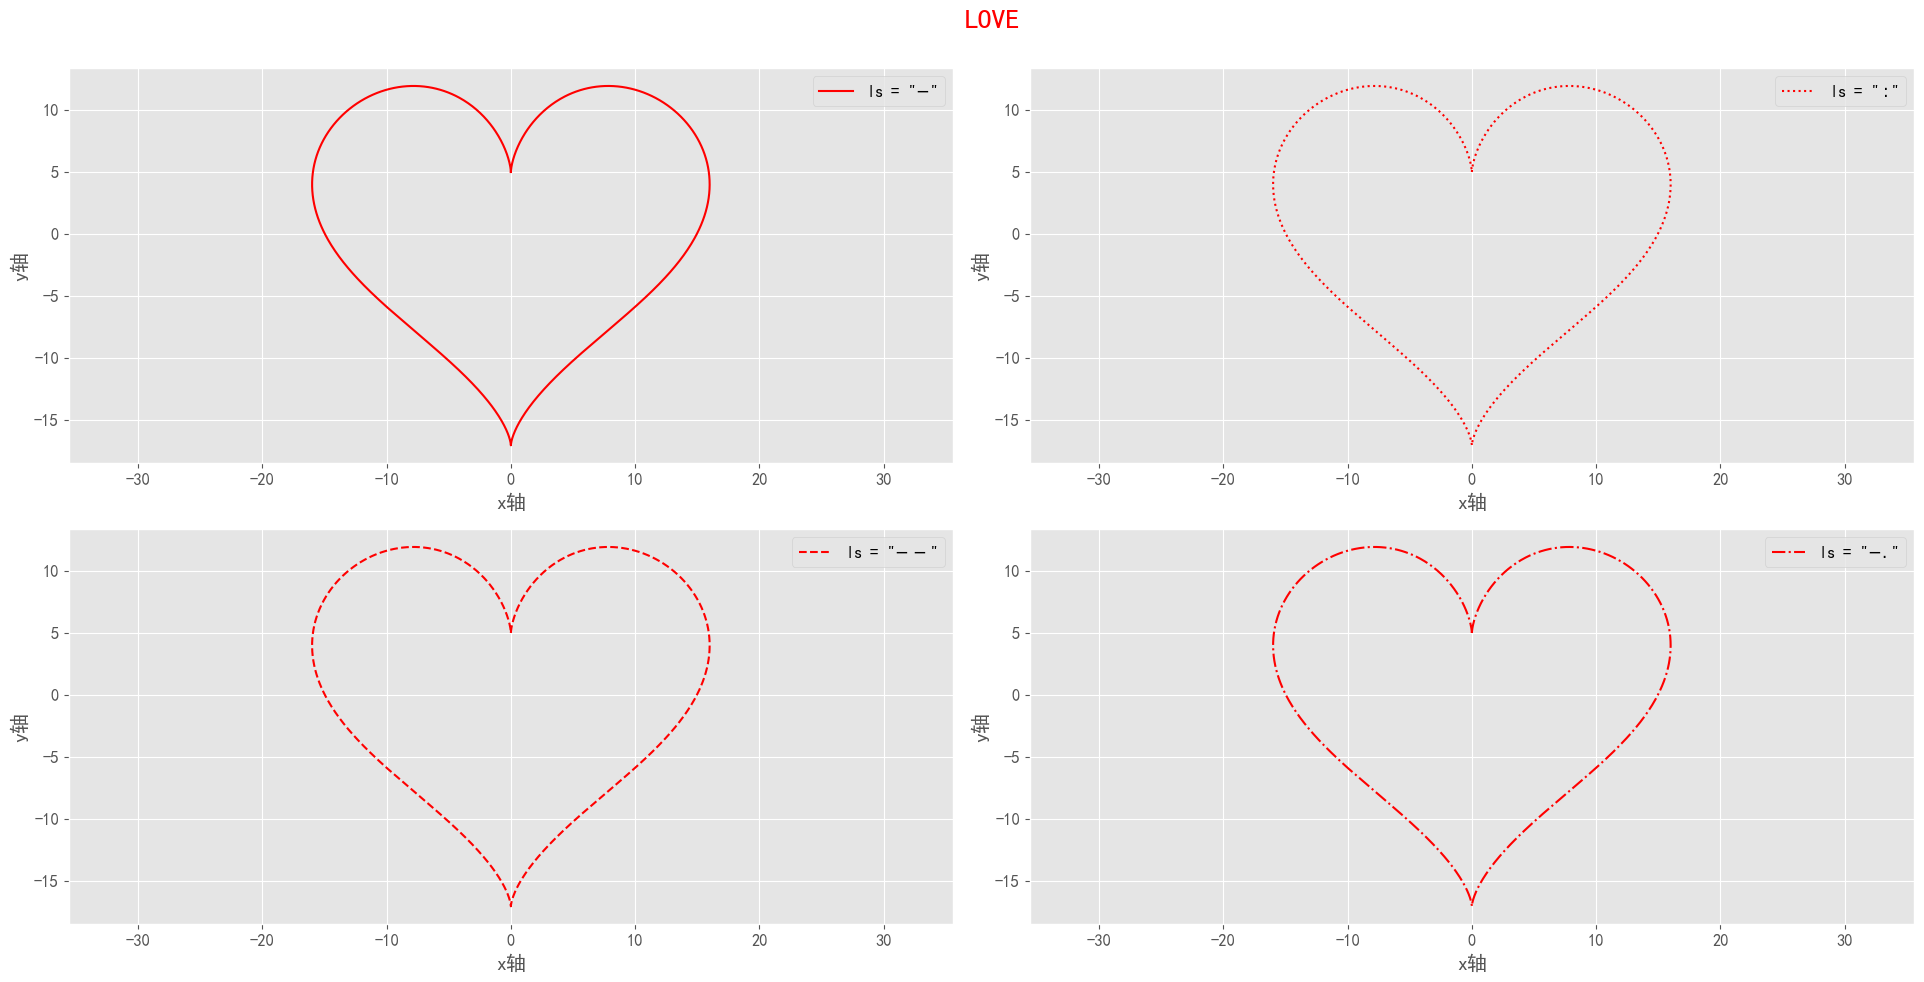

In [4]:
ls_list=['-',':','--','-.']
ncols=2
nrows=int(np.ceil(len(ls_list)/ncols))
fig,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,5*nrows))
for idx,ls in enumerate(ls_list):
    x1=idx//ncols
    x2=idx%ncols

    ax[x1,x2].plot(love_x,love_y,ls=ls,color='red',label=f'ls = "${ls}$"')
    ax[x1,x2].legend()
    ax[x1,x2].set_xlim(-30,30)
    ax[x1,x2].set_ylim(-15,10)
    ax[x1,x2].set_xlabel('x轴')
    ax[x1,x2].set_ylabel('y轴')
    ax[x1,x2].axis('equal') # x,y轴比例一致

for idx in range(len(ls_list),ncols*nrows):
    x1=idx//ncols
    x2=idx%ncols
    fig.delaxes(ax[x1,x2])

plt.suptitle('LOVE',fontsize=20,color='red',backgroundcolor='white')
plt.tight_layout(rect=(0,0,0.97,0.98)) # 这个一定要放在show和savefig之上
plt.savefig('png/多图.png') # 这个一定要放在show之上
plt.show()

#### 模板四：多图（不同比例）

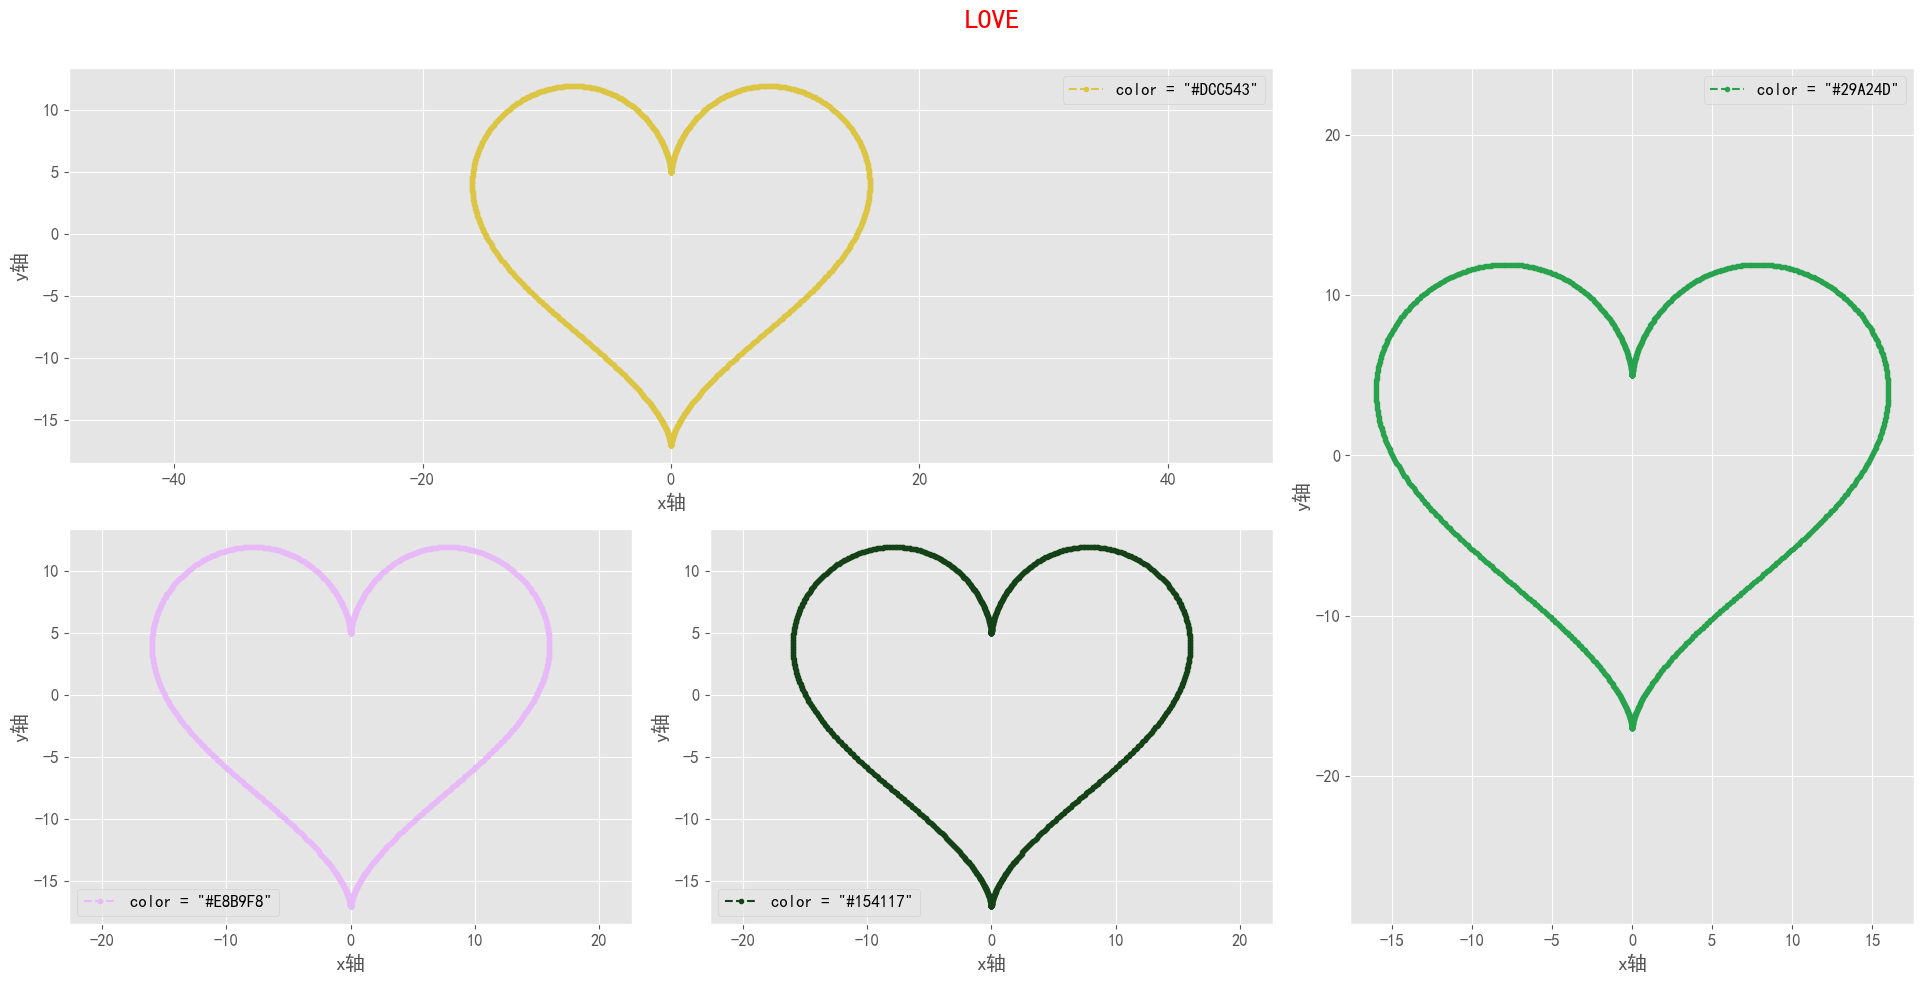

In [5]:
def get_random_colors(num,seed=2024):
    # 随机颜色
    np.random.seed(seed)
    colors=[]
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    while len(colors) < num:
        color ="#"+''.join([np.random.choice(colorArr) for i in range(6)])
        if color not in colors:
            colors.append(color)
    return colors

ncols=3
nrows=2
colors=get_random_colors(4,seed=520)
plt.figure(figsize=(20,5*nrows))
for idx,color in enumerate(colors):
    x1=idx//ncols
    x2=idx%ncols

    if idx == 0:
        ax = plt.subplot2grid(shape=[nrows,ncols],loc=[idx,0],colspan=2)
    elif idx == 1:
        ax = plt.subplot2grid(shape=[nrows,ncols],loc=[0,2],rowspan=2)
    elif idx == 2:
        ax = plt.subplot2grid(shape=[nrows,ncols],loc=[1,0])
    else:
        ax = plt.subplot2grid(shape=[nrows,ncols],loc=[1,1])
    ax.plot(love_x,love_y,ls='--',marker='o',markersize=3,color=color,label=f'color = "{color}"')
    ax.legend()
    ax.set_xlim(-30,30)
    ax.set_ylim(-15,10)
    ax.set_xlabel('x轴')
    ax.set_ylabel('y轴')
    ax.axis('equal') # x,y轴比例一致

plt.suptitle('LOVE',fontsize=20,color='red',backgroundcolor='white')
plt.tight_layout(rect=(0,0,0.97,0.98)) # 这个一定要放在show和savefig之上
plt.savefig('png/多图（不同比例）.png') # 这个一定要放在show之上
plt.show()

### 三、画法技巧

#### （1）刻度旋转

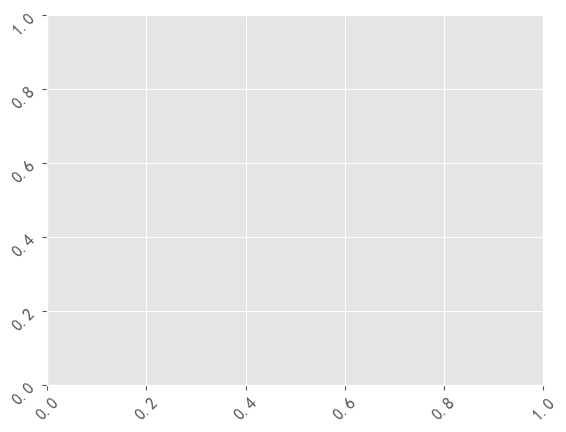

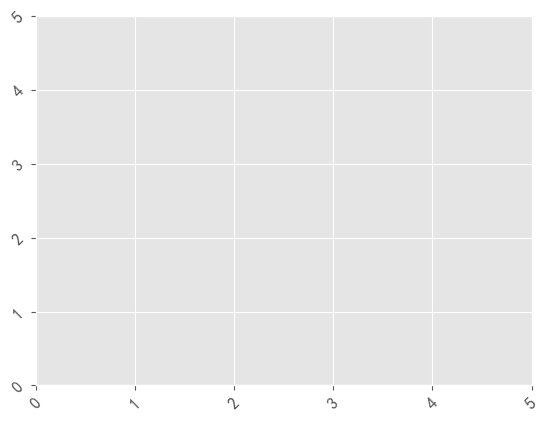

In [6]:
# 单图
# 方式一
plt.xticks(rotation=45) # x轴
plt.yticks(rotation=45) # y轴
# 方式二
plt.tick_params(axis='x',labelrotation=45) # x轴
plt.tick_params(axis='y',labelrotation=45) # y轴

# 多图，其中，ticks为刻度列表值且不能省略
fig,ax=plt.subplots()
ticks=range(10)
# 方式一
ax.set_xticklabels(ticks,rotation=45) # x轴
ax.set_yticklabels(ticks,rotation=45) # y轴
# 方式二
ax.tick_params(axis='x',labelrotation=45) # x轴
ax.tick_params(axis='y',labelrotation=45) # y轴

#### （2）刻度百分比显示

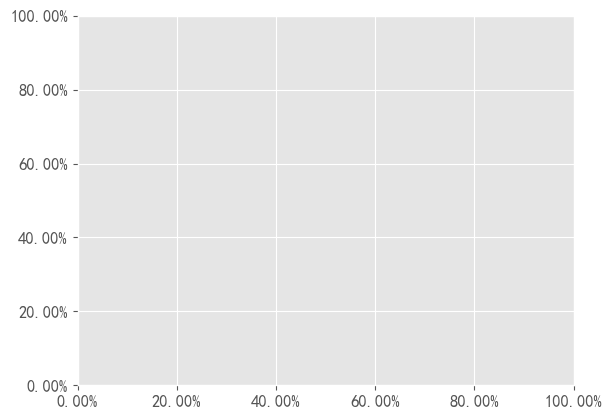

In [7]:
formatter=ticker.PercentFormatter(xmax=1, decimals=2) # 百分比，保留两位小数

# 单图
plt.gca().xaxis.set_major_formatter(formatter) # x轴
plt.gca().yaxis.set_major_formatter(formatter) # y轴

# 多图
ax.xaxis.set_major_formatter(formatter) # x轴
ax.yaxis.set_major_formatter(formatter) # y轴

#### （3）图例换行

In [8]:
def custom_legend_layout(axis,n_items=7,offset=0.25,vertical=True,loc='upper left',first_bbox_to_anchor=(0.1, 1),**kwargs):
    if isinstance(axis,tuple):
        axis,handlers,labels=axis
    else:
        handlers,labels=get_legend_handles_labels(axs=[axis]) # note:  the param axs is list object

    # 确保n_items不为0，避免除以0的错误
    n_items = max(1, n_items)
    # 计算需要多少个图例
    n_legends = len(handlers) // n_items + (1 if len(handlers) % n_items else 0)

    # 计算每个图例的bbox_to_anchor
    for i in range(n_legends):
        start_idx = i * n_items
        end_idx = min(start_idx + n_items, len(handlers))
        legend_lines = handlers[start_idx:end_idx]
        legend_labels = labels[start_idx:end_idx]

        if vertical:
            # 对于垂直布局
            ncol = 1
            if i == 0:
                bbox_anchor = first_bbox_to_anchor
            else:
                # 计算后续图例的bbox_to_anchor
                bbox_anchor = (first_bbox_to_anchor[0] + i * offset, first_bbox_to_anchor[1])
        else:
            # 对于水平布局
            ncol = len(legend_lines)
            if i == 0:
                bbox_anchor = first_bbox_to_anchor
            else:
                # 计算后续图例的bbox_to_anchor
                bbox_anchor = (first_bbox_to_anchor[0], first_bbox_to_anchor[1] - i * offset)

        legend = axis.legend(legend_lines, legend_labels, loc=loc, bbox_to_anchor=bbox_anchor, ncol=ncol, frameon=True, **kwargs)
        axis.add_artist(legend)

# example：(替换掉plt.legend)
# 单图：custom_legend_layout(plt.gca(),n_items=7, offset=0.20, vertical=True,loc='upper left', first_bbox_to_anchor=(0.01, 1))
# 单图多y轴：custom_legend_layout((ax,handlers,labels),n_items=7, offset=0.20, vertical=True,loc='upper left', first_bbox_to_anchor=(0.01, 1))
# 多图：custom_legend_layout(ax,n_items=7, offset=0.20, vertical=True,loc='upper left', first_bbox_to_anchor=(0.01, 1))

#### （4）marker

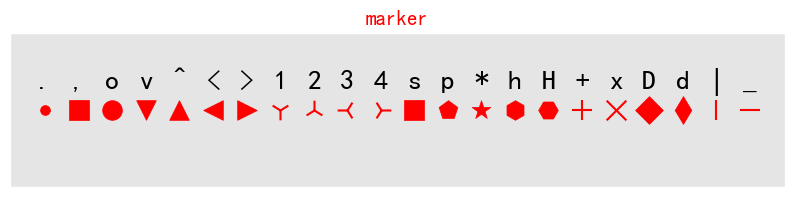

In [9]:
marker_list=['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
plt.figure(figsize=(10,2))
for idx,marker in enumerate(marker_list):
    plt.scatter(idx+5,5,marker=marker,s=200,color='red')
    plt.text(idx+5,5.1,marker,fontdict={'size':20},va='center',ha='center')
plt.xticks([]) # 隐藏x轴刻度
plt.yticks([]) # 隐藏y轴刻度
plt.title('marker',fontsize=15,color='red',backgroundcolor='white')
plt.savefig('png/marker.png') # 这个一定要放在show之上
plt.show()

#### （5）填充颜色

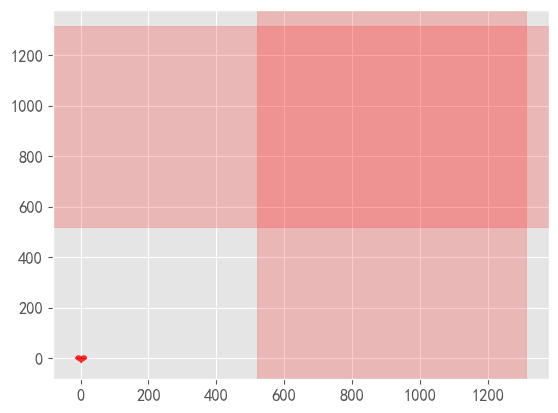

In [10]:
# x/y区间范围填充
start,end=520,1314
plt.axvspan(start,end,alpha=0.2,color='red') # 填充x=start -> end
plt.axhspan(start,end,alpha=0.2,color='red') # 填充y=start -> end

# 在x范围内填充两条y之间区域
plt.fill_between(love_x,0,love_y,color='red',alpha=0.8)

#### （6）添加标记/文本

Text(0.52, 0.1314, '5201314')

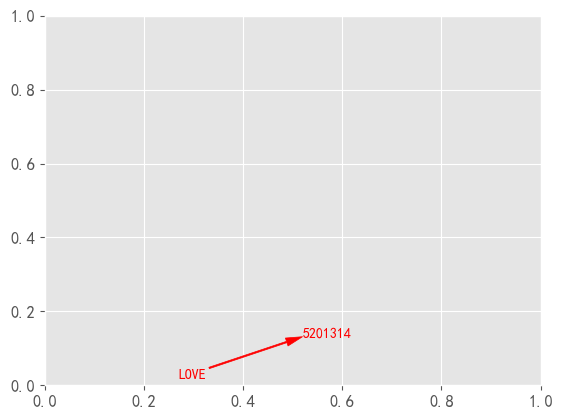

In [11]:
# 这里xy是需要标记的坐标，xytext是注释文本的坐标，默认与xy相同，arrowprops箭头属性，是一个字典，包含箭头的样式、颜色等信息
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib.pyplot.annotate
plt.annotate('LOVE',xy=(0.520, 0.1314),xytext=(0.520**2, 0.1314**2),color='red',size=10,arrowprops=dict(color='red',width=1,headwidth=6))

# 在x,y坐标点添加文本
plt.text(0.520,0.1314,s='5201314',color='red',size=10)

#### （7）画横竖线

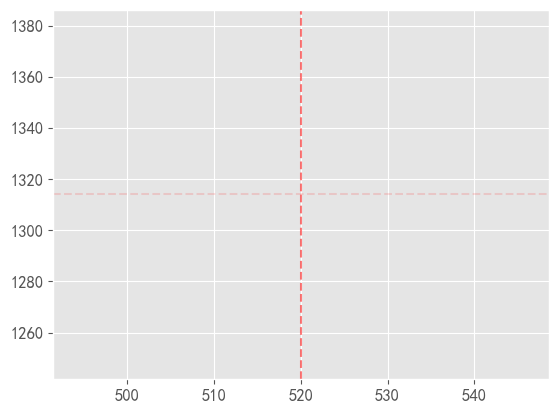

In [12]:
# ax替换掉plt也可以
plt.axvline(x=520,ls='--',color='red',alpha=0.520) # 竖线
plt.axhline(y=1314,ls='--',color='red',alpha=0.1314) # 横线

#### （8）隐藏边框线

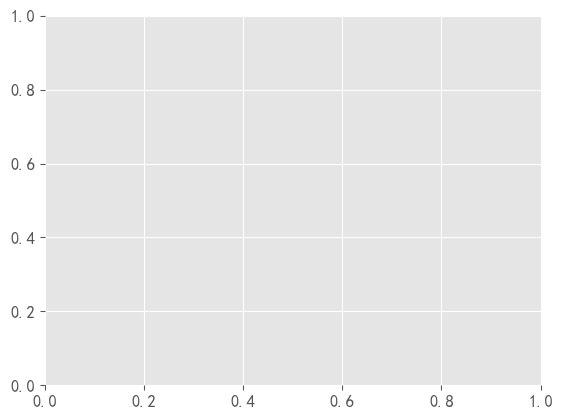

In [13]:
# ax替换掉plt.gca()也可以
plt.gca().spines.top.set_visible(False) # 上边线
plt.gca().spines.bottom.set_visible(False) # 下边线
plt.gca().spines.left.set_visible(False) # 左边线
plt.gca().spines.right.set_visible(False) # 右边线

### 四、图表模板

#### （1）折线图

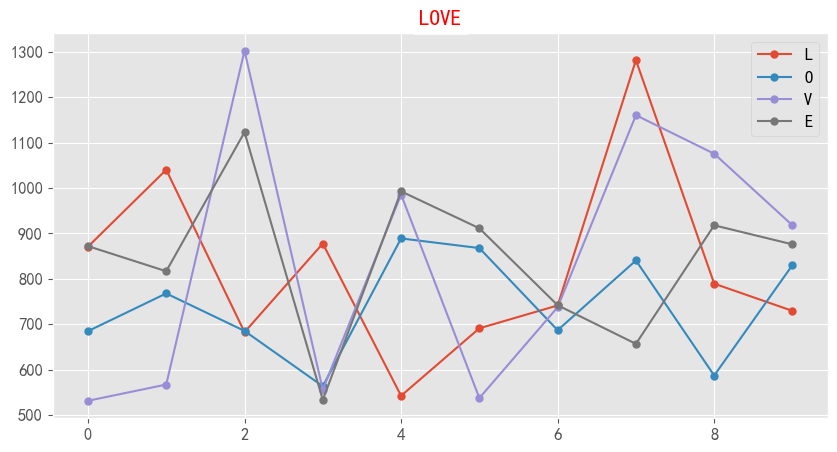

In [14]:
plt.figure(figsize=(10,5))
for love in love_label:
    plt.plot(range(len(love_df)),love_df[love],marker='o',markersize=5,label=love)
plt.legend()
plt.title('LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.savefig('png/折线图.png') # 这个一定要放在show之上
plt.show()

#### （2）饼图

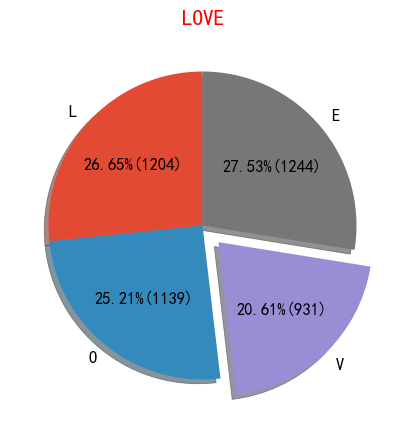

In [15]:
def make_autopct(values):
    # 即显示数值又显示百分比
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(10,5))
plt.pie(
    love_data,labels=love_label,
    colors=[f'C{i}' for i in range(len(love_label))],
    autopct=make_autopct(love_data),shadow=True,
    explode=[0,0,0.15,0],
    startangle=90,
)
plt.title('LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.savefig('png/饼图.png') # 这个一定要放在show之上
plt.show()

#### （3）散点图（不同大小不同颜色）

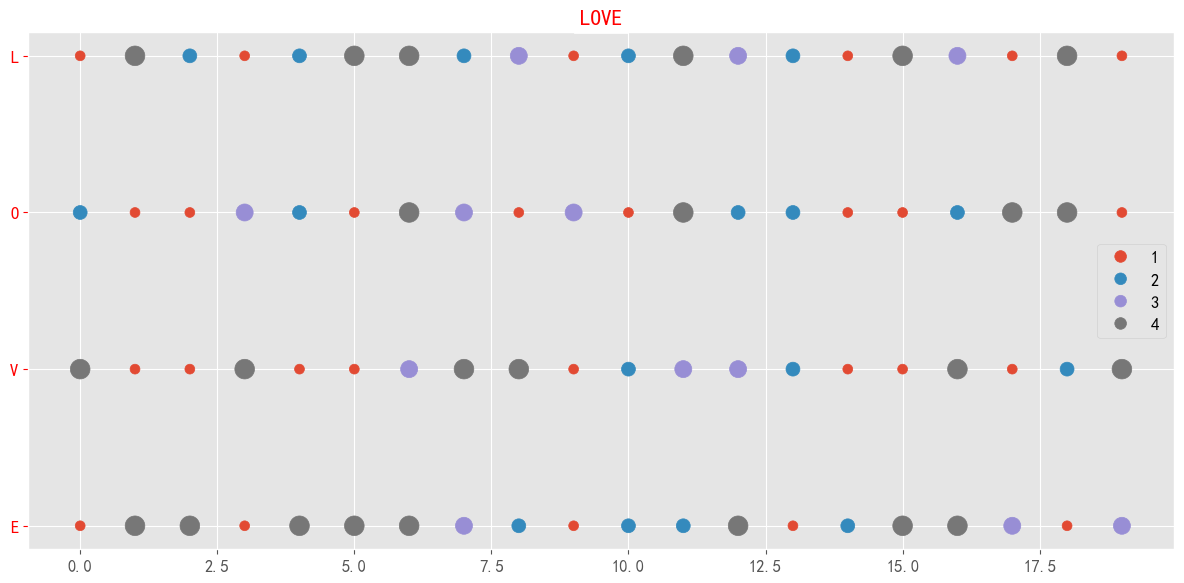

In [16]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

np.random.seed(520)
scatter_data=np.random.randint(1,5,size=(4,20))
scatter_label=['L','O','V','E']

plt.figure(figsize=(12,6))
v_set=set()
for data,label in zip(scatter_data,scatter_label[::-1]):
    plt.scatter(range(len(data)),[label]*len(data),s=data*50,color=[f'C{i-1}' for i in data])
    v_set|=set(data)

labels = [f'{i}' for i in sorted(v_set)]
color = [f'C{i}' for i in range(len(labels))]
patches = [mpatches.Circle((0.5, 0.5),color=color[i]) for i in range(len(labels))]
plt.legend(patches,labels, handler_map={mpatches.Circle: HandlerEllipse()})
plt.tick_params('y', colors='red') # y轴颜色
plt.title('LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.tight_layout() # 这个一定要放在show和savefig之上
plt.savefig('png/散点图（不同大小不同颜色）.png') # 这个一定要放在show之上
plt.show()

#### （4）散点图（不同类型不同颜色）

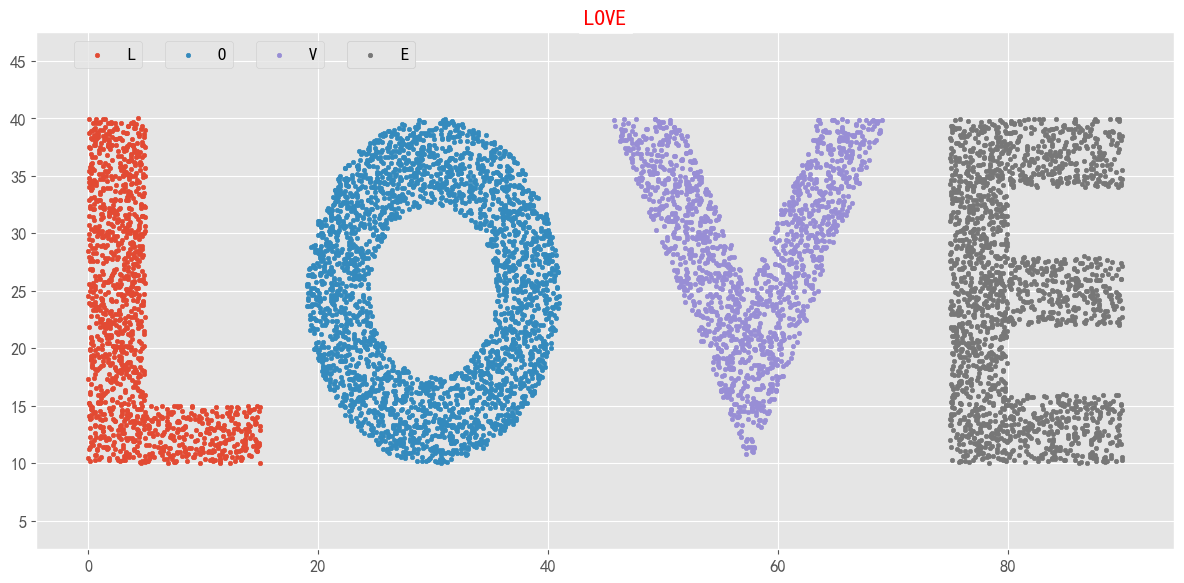

In [17]:
def get_LOVE():
    np.random.seed(520)

    x1=np.random.choice(np.random.uniform(0,5,size=10000),replace=False,size=(1000,1))
    y1=np.random.choice(np.random.uniform(10,40,size=10000),replace=False,size=(1000,1))
    x2=np.random.choice(np.random.uniform(5,15,size=10000),replace=False,size=(300,1))
    y2=np.random.choice(np.random.uniform(10,15,size=10000),replace=False,size=(300,1))
    L=np.vstack([np.concatenate([x1,y1],axis=1),np.concatenate([x2,y2],axis=1)])

    center=(30,25)
    a = (5.5,11)
    b = (7.5,15)
    O=[]
    for _ in range(5000):
        x=np.random.uniform(center[0]-max(a),center[0]+max(a))
        y=np.random.uniform(center[1]-max(b),center[1]+max(b))
        if (x-center[0])**2/a[0]**2+(y-center[1])**2/b[0]**2 >= 1 and (x-center[0])**2/a[1]**2+(y-center[1])**2/b[1]**2 <= 1:
            # 椭圆标准方程为 (x-h)² / a² + (y-k)² / b² = 1 ，其中h,k为椭圆中心点，a,b为长短半轴，a>b时为横向椭圆，a<b时为纵向椭圆
            O.append([x,y])
    O=np.array(O)

    point1=(57.5,25)
    point2=(point1[0],point1[1]-15)
    y_min,y_max=point2[1],40
    slope=2.5
    intercept1_left=(point1[1]+slope*point1[0])
    intercept2_left=(point2[1]+slope*point2[0])
    intercept1_right=-(slope*point1[0]-point1[1])
    intercept2_right=-(slope*point2[0]-point2[1])
    V=[]
    for _ in range(2000):
        x=np.random.uniform((y_max-intercept2_left)/(-slope),point1[0])
        y=np.random.uniform(y_min,y_max)
        if intercept2_left <= y-(-slope)*x <= intercept1_left:
            # 判断x,y这个点在相同斜率时，截距是否在两条线之间
            V.append([x,y])

        x=np.random.uniform(point1[0],(y_max-intercept2_right)/slope)
        y=np.random.uniform(y_min,y_max)
        if intercept2_right <= y-slope*x <= intercept1_right:
            # 判断x,y这个点在相同斜率时，截距是否在两条线之间
            V.append([x,y])
    V=np.array(V)

    x_min=75
    x1=np.random.choice(np.random.uniform(x_min,x_min+5,size=10000),replace=False,size=(1000,1))
    y1=np.random.choice(np.random.uniform(10,40,size=10000),replace=False,size=(1000,1))
    x2=np.random.choice(np.random.uniform(x_min+5,x_min+15,size=10000),replace=False,size=(300,1))
    y2=np.random.choice(np.random.uniform(34,40,size=10000),replace=False,size=(300,1))
    y3=np.random.choice(np.random.uniform(22,28,size=10000),replace=False,size=(300,1))
    y4=np.random.choice(np.random.uniform(10,16,size=10000),replace=False,size=(300,1))
    E=np.vstack([np.concatenate([x1,y1],axis=1),np.concatenate([x2,y2],axis=1),np.concatenate([x2,y3],axis=1),np.concatenate([x2,y4],axis=1)])

    return L,O,V,E

L,O,V,E=get_LOVE()

plt.figure(figsize=(12,6))
plt.scatter(L[:,0],L[:,1],s=10,label='L')
plt.scatter(O[:,0],O[:,1],s=10,label='O')
plt.scatter(V[:,0],V[:,1],s=10,label='V')
plt.scatter(E[:,0],E[:,1],s=10,label='E')

plt.title('LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.axis('equal')
custom_legend_layout(plt.gca(),n_items=1, offset=0.08, vertical=True,loc='best')
plt.tight_layout() # 这个一定要放在show和savefig之上
plt.savefig('png/散点图（不同类型不同颜色）.png') # 这个一定要放在show之上
plt.show()

#### （5）散点图（四象限）

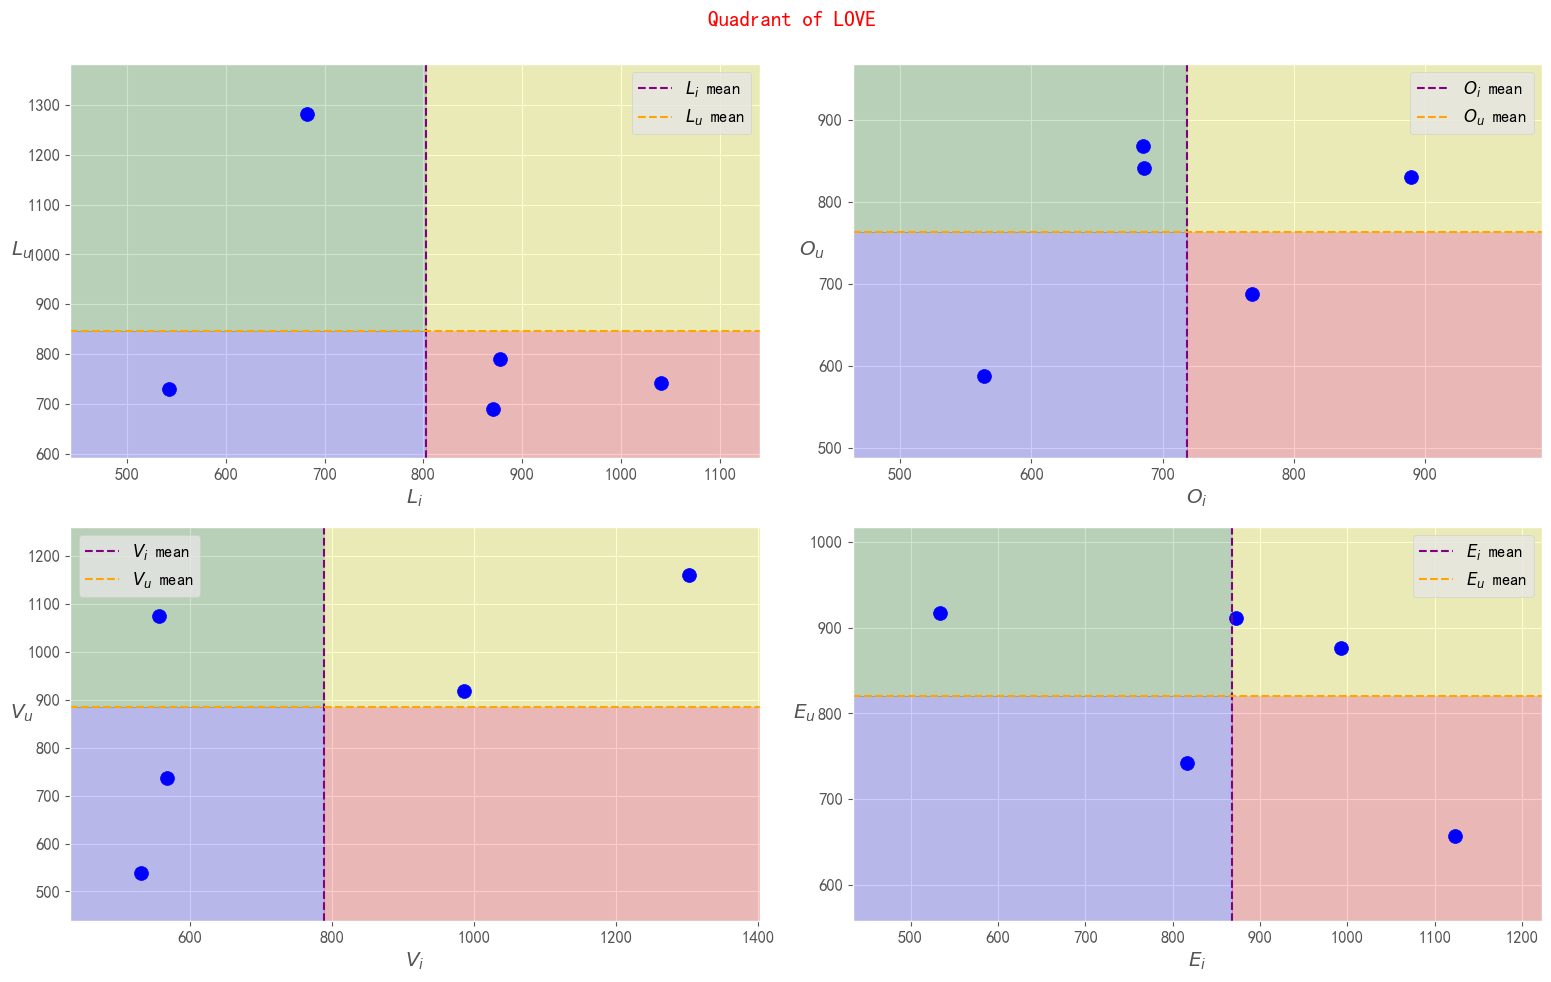

In [18]:
love_df_i=love_df.head(5)
love_df_u=love_df.tail(5)

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))
for idx,love in enumerate(love_label):
    x1=idx//2
    x2=idx%2

    # 相交点
    x = love_df_i[love].mean()
    y = love_df_u[love].mean()

    # x 轴和 y 轴的范围
    xmin = love_df_i[love].min()-100
    xmax = love_df_i[love].max()+100
    ymin = love_df_u[love].min()-100
    ymax = love_df_u[love].max()+100

    # 绘制十字线
    ax[x1,x2].axvline(x=x, color='purple', linestyle='--',label=f'${love}_i$ mean')
    ax[x1,x2].axhline(y=y, color='orange', linestyle='--',label=f'${love}_u$ mean')

    # 填充四个象限的颜色
    ax[x1,x2].fill_between([xmin, x], [ymin, ymin], [y, y], color='blue', alpha=0.2)
    ax[x1,x2].fill_between([xmin, x], [y, y], [ymax, ymax], color='green', alpha=0.2)
    ax[x1,x2].fill_between([x, xmax], [ymin, ymin], [y, y], color='red', alpha=0.2)
    ax[x1,x2].fill_between([x, xmax], [y, y], [ymax, ymax], color='yellow', alpha=0.2)

    # 设置 x 轴和 y 轴的范围
    ax[x1,x2].set_xlim(xmin, xmax)
    ax[x1,x2].set_ylim(ymin, ymax)
    ax[x1,x2].set_xlabel(f'${love}_i$')
    ax[x1,x2].set_ylabel(f'${love}_u$',rotation=0)
    ax[x1,x2].legend()

    # 添加散点
    ax[x1,x2].scatter(love_df_i[love], love_df_u[love], s=100, color='blue')

plt.suptitle('Quadrant of LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.tight_layout(rect=(0,0,0.98,0.98)) # 这个一定要放在show和savefig之上
plt.savefig('png/散点图（四象限）.png') # 这个一定要放在show之上
plt.show()

#### （6）柱状图（单个）

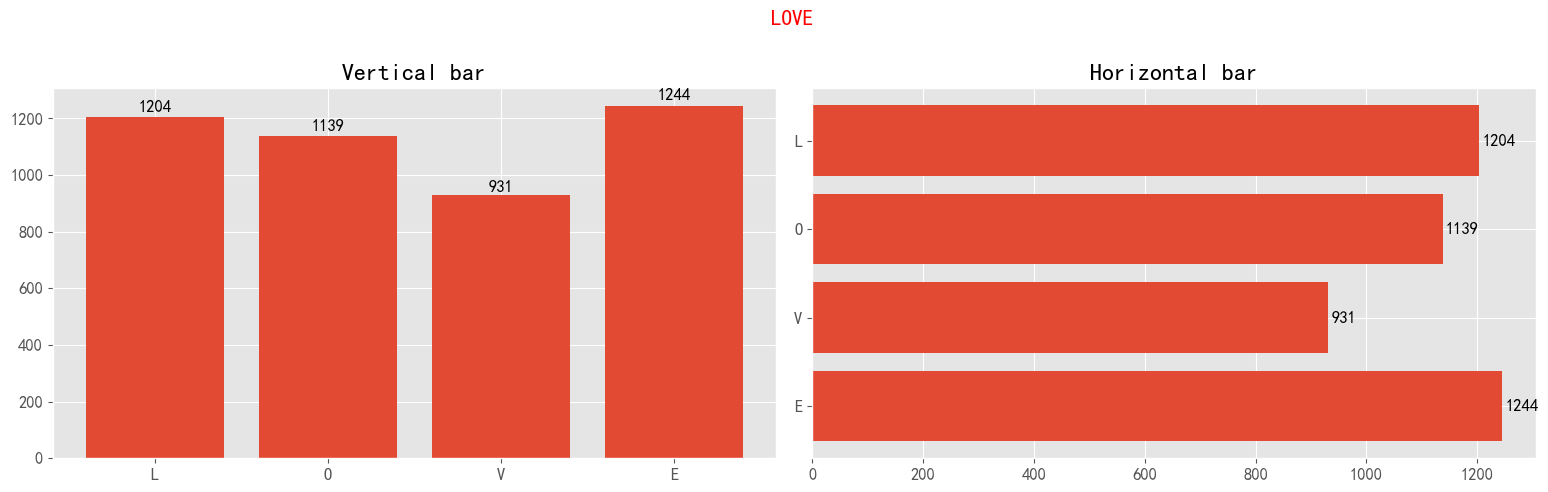

In [19]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,5))
ax[0].bar(love_label,love_data)
for i,j in zip(love_label,love_data):
    ax[0].text(i,j*1.03,s=f"{j:.0f}",ha='center',va='center')
ax[0].set_title('Vertical bar')

ax[1].barh(love_label[::-1],love_data[::-1])
for i,j in zip(love_label[::-1],love_data[::-1]):
    ax[1].text(j*1.03,i,s=f"{j:.0f}",ha='center',va='center')
ax[1].set_title('Horizontal bar')

plt.suptitle('LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.tight_layout(rect=(0,0,0.98,0.98)) # 这个一定要放在show和savefig之上
plt.savefig('png/柱状图（单个）.png') # 这个一定要放在show之上
plt.show()

#### （7）柱状图（多个）

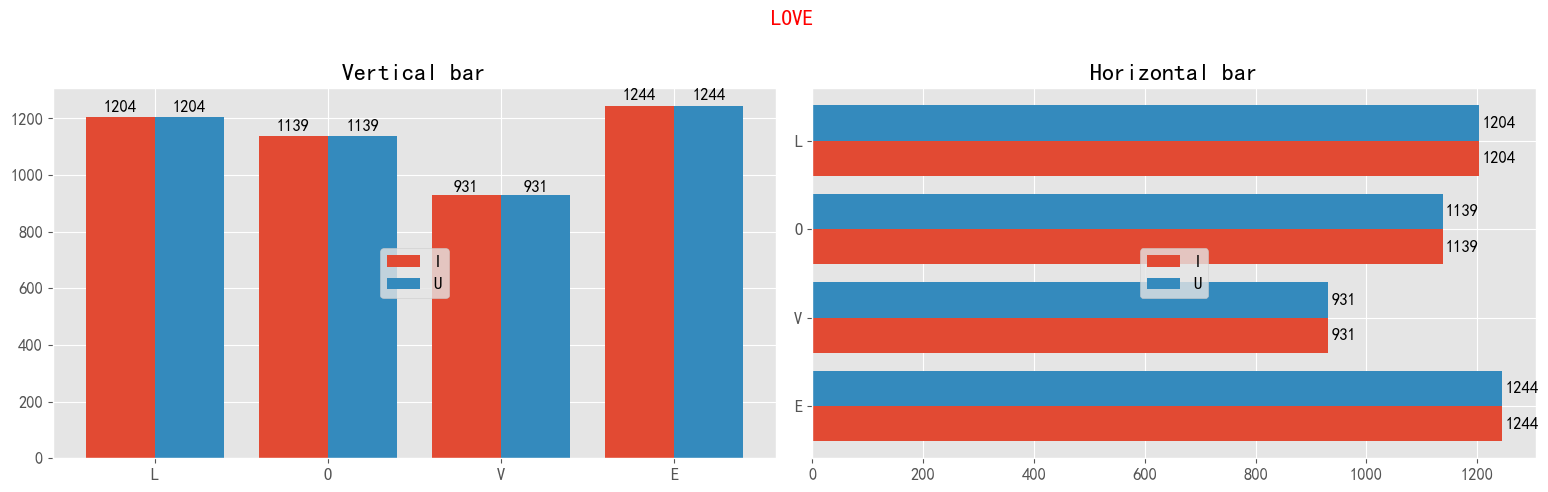

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,5))

labels=['I','U']
seriesNums=len(love_label)
totalWidth=0.8
labelNums=len(labels)
barWidth=totalWidth/labelNums

for i,label in enumerate(labels):
    xticks=[x+barWidth*i for x in range(seriesNums)]
    ax[0].bar(xticks,love_data,label=label,width=barWidth)
    for j in range(len(xticks)):
        ax[0].text(xticks[j],love_data[j]*1.03,s=f"{love_data[j]:.0f}",ha='center',va='center')
ax[0].legend(loc='center')
ax[0].set_xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], love_label)
ax[0].set_title('Vertical bar')

for i,label in enumerate(labels):
    yticks=[y+barWidth*i for y in range(seriesNums)]
    ax[1].barh(yticks,love_data[::-1],label=label,height=barWidth)
    for j in range(len(yticks)):
        ax[1].text(love_data[::-1][j]*1.03,yticks[j],s=f"{love_data[::-1][j]:.0f}",ha='center',va='center')
ax[1].legend(loc='center')
ax[1].set_yticks([y+barWidth/2*(labelNums-1) for y in range(seriesNums)], love_label[::-1])
ax[1].set_title('Horizontal bar')

plt.suptitle('LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.tight_layout(rect=(0,0,0.98,0.98)) # 这个一定要放在show和savefig之上
plt.savefig('png/柱状图（多个）.png') # 这个一定要放在show之上
plt.show()

#### （8）柱状图（单个-堆叠）

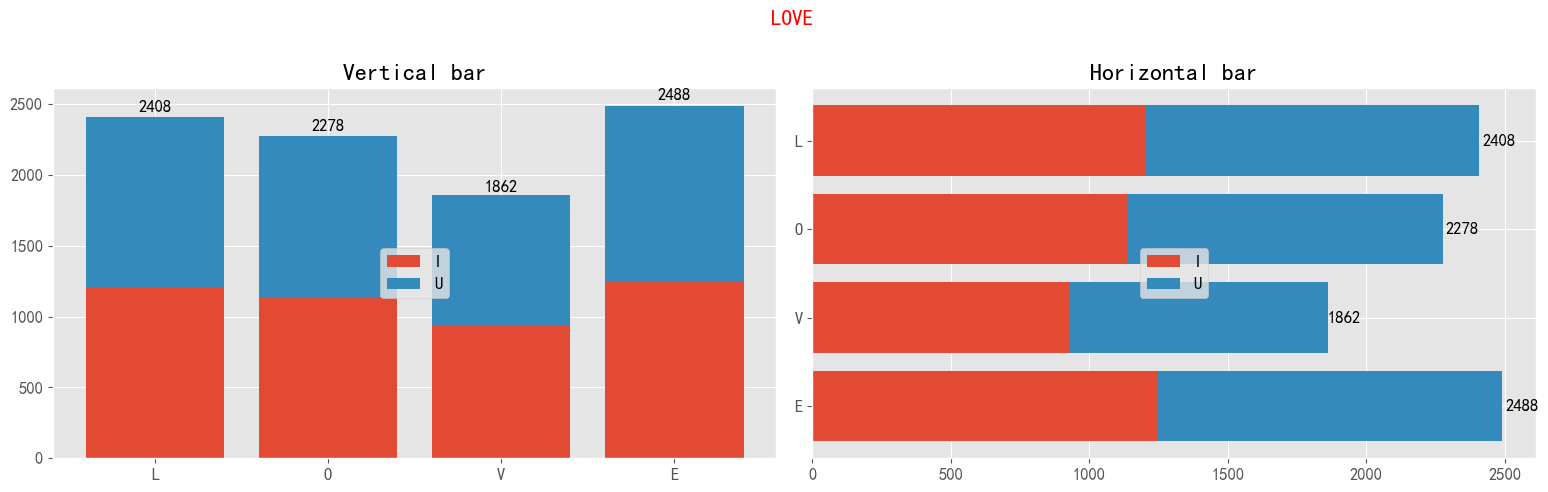

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,5))
ax[0].bar(love_label,love_data,label='I')
ax[0].bar(love_label,love_data,bottom=love_data,label='U')
for i,j in zip(love_label,love_data*2):
    ax[0].text(i,j*1.03,s=f"{j:.0f}",ha='center',va='center')
ax[0].legend(loc='center')
ax[0].set_title('Vertical bar')

ax[1].barh(love_label[::-1],love_data[::-1],label='I')
ax[1].barh(love_label[::-1],love_data[::-1],left=love_data[::-1],label='U')
for i,j in zip(love_label[::-1],love_data[::-1]*2):
    ax[1].text(j*1.03,i,s=f"{j:.0f}",ha='center',va='center')
ax[1].legend(loc='center')
ax[1].set_title('Horizontal bar')

plt.suptitle('LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.tight_layout(rect=(0,0,0.98,0.98)) # 这个一定要放在show和savefig之上
plt.savefig('png/柱状图（单个-堆叠）.png') # 这个一定要放在show之上
plt.show()

#### （9）柱状图（多个-堆叠）

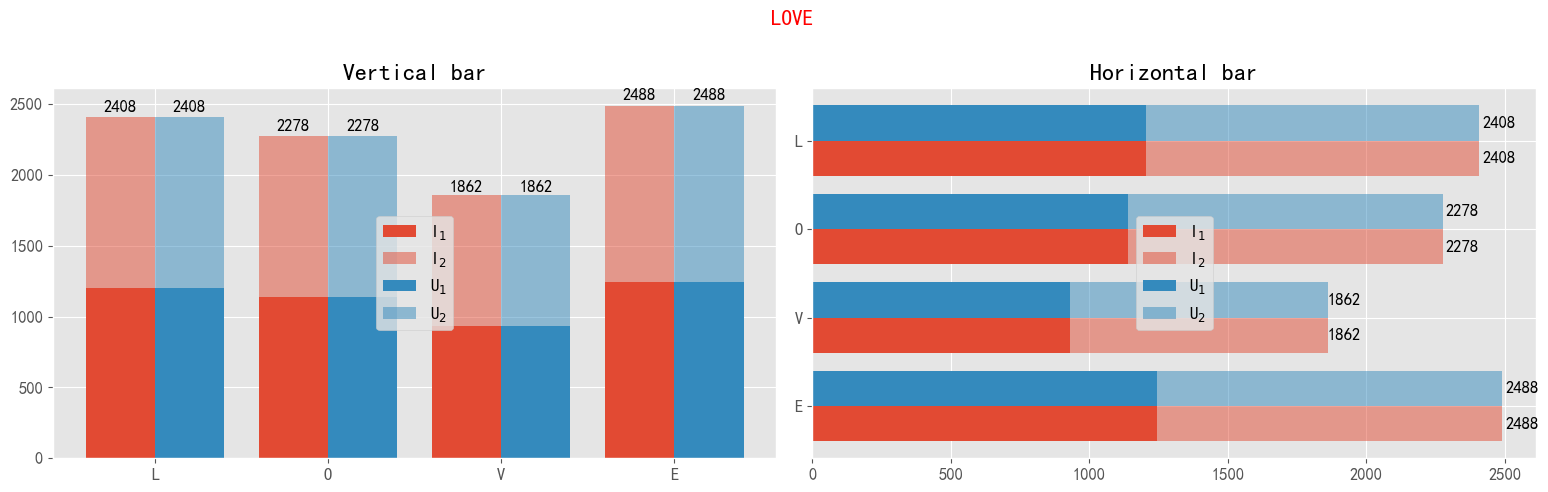

In [22]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,5))

labels=['I','U']
seriesNums=len(love_label)
totalWidth=0.8
labelNums=len(labels)
barWidth=totalWidth/labelNums

for i,label in enumerate(labels):
    xticks=[x+barWidth*i for x in range(seriesNums)]
    ax[0].bar(xticks,love_data,label=f'{label}$_1$',width=barWidth,color=f'C{i}')
    ax[0].bar(xticks,love_data,label=f'{label}$_2$',width=barWidth,color=f'C{i}',alpha=0.5,bottom=love_data)
    for j in range(len(xticks)):
        ax[0].text(xticks[j],(love_data*2)[j]*1.03,s=f"{(love_data*2)[j]:.0f}",ha='center',va='center')
ax[0].legend(loc='center')
ax[0].set_xticks([x+barWidth/2*(labelNums-1) for x in range(seriesNums)], love_label)
ax[0].set_title('Vertical bar')

for i,label in enumerate(labels):
    yticks=[y+barWidth*i for y in range(seriesNums)]
    ax[1].barh(yticks,love_data[::-1],label=f'{label}$_1$',height=barWidth,color=f'C{i}')
    ax[1].barh(yticks,love_data[::-1],label=f'{label}$_2$',height=barWidth,color=f'C{i}',alpha=0.5,left=love_data[::-1])
    for j in range(len(yticks)):
        ax[1].text((love_data*2)[::-1][j]*1.03,yticks[j],s=f"{(love_data*2)[::-1][j]:.0f}",ha='center',va='center')
ax[1].legend(loc='center')
ax[1].set_yticks([y+barWidth/2*(labelNums-1) for y in range(seriesNums)], love_label[::-1])
ax[1].set_title('Horizontal bar')

plt.suptitle('LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.tight_layout(rect=(0,0,0.98,0.98)) # 这个一定要放在show和savefig之上
plt.savefig('png/柱状图（多个-堆叠）.png') # 这个一定要放在show之上
plt.show()

#### （10）箱线图

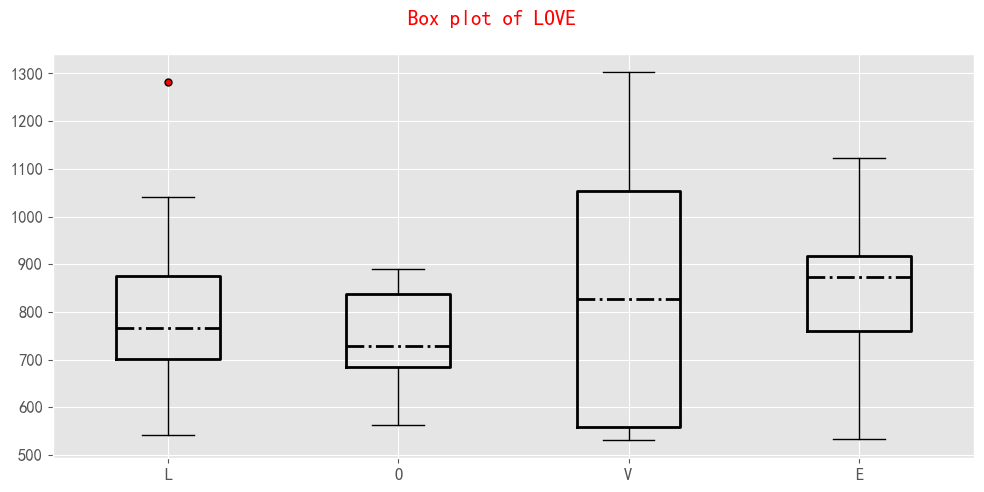

In [23]:
plt.figure(figsize=(10,5))
plt.boxplot(
    love_df,
    labels=love_label,
    boxprops=dict(linestyle='-', linewidth=2, color='black'), # 边框
    flierprops=dict(marker='o', markerfacecolor='red', markersize=5), # 离群点
    medianprops=dict(linestyle='-.', linewidth=2, color='black') # 中位数
)
plt.suptitle('Box plot of LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.tight_layout() # 这个一定要放在show和savefig之上
plt.savefig('png/箱线图.png') # 这个一定要放在show之上
plt.show()

#### （11）相关系数图

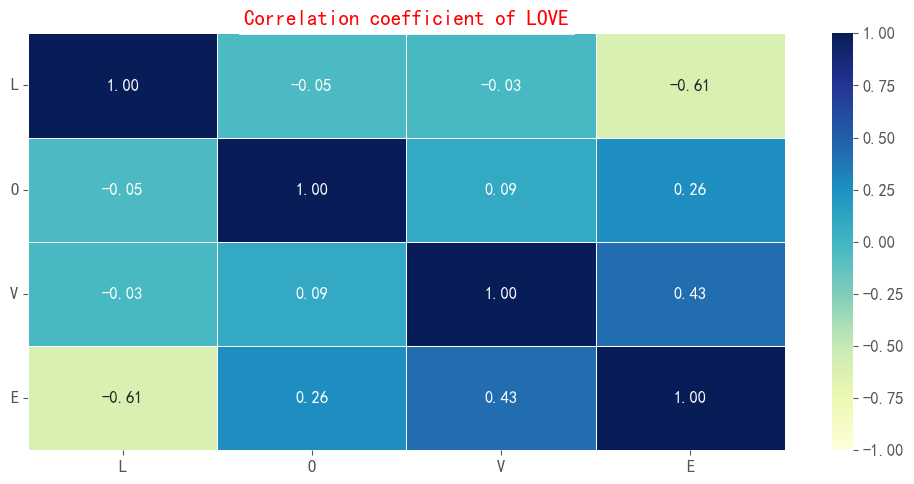

In [24]:
np.random.seed(520)
corr=love_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(
    data=corr,
    vmin=-1,
    vmax=1,
    cmap='YlGnBu',
    annot=True,
    fmt=".2f",
    linewidths=0.5, # 每个方格外框显示，外框宽度设置
    # mask=np.triu(np.ones_like(corr,dtype=np.bool_)) # 显示对脚线下面部分图
)
plt.title('Correlation coefficient of LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.yticks(rotation=0)
plt.tight_layout() # 这个一定要放在show和savefig之上
plt.savefig('png/相关系数图.png') # 这个一定要放在show之上
plt.show()

#### （12）密度分布图

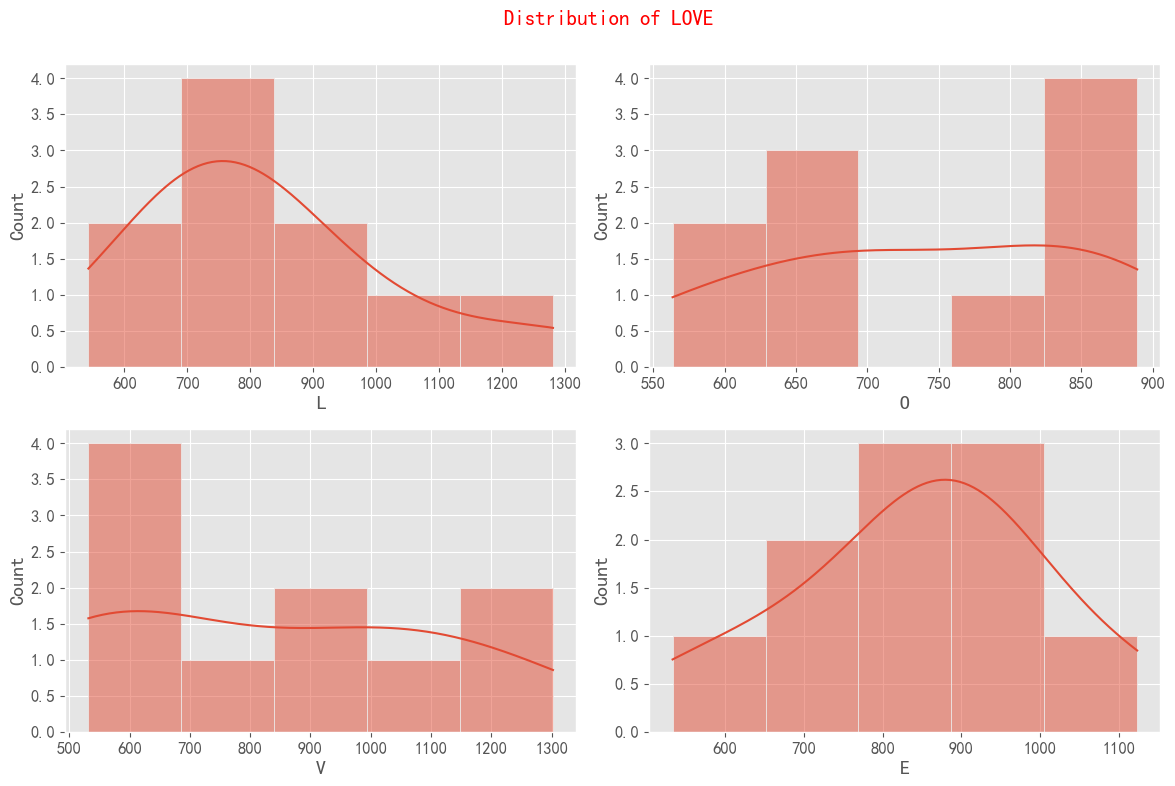

In [25]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,8))
for idx,col in enumerate(love_df.columns):
    sns.histplot(love_df[col],kde=True,ax=ax[idx//2,idx%2])

plt.suptitle('Distribution of LOVE',fontsize=15,color='red',backgroundcolor='white')
plt.tight_layout(rect=(0,0,0.98,0.98)) # 这个一定要放在show和savefig之上
plt.savefig('png/密度分布图.png') # 这个一定要放在show之上
plt.show()